# A Basic Model for Machine Learning 

## This exercise gives a brief overview of creating and using a machine learning model

The basic model has the follwoing steps:
    1. Import and understand the data that you are going to work with. Understand the problem at hand.
    2. Prepare the data for building the model.
    3. Create and build the machine learning model.
    4. Visualize the results
    5. Measure the performance of the model.
    

### Step 1: Import and understand the data. Understand the problem.

In [1]:
# Import appropriate machine learning library. This example uses Decision Tree Model. 

from sklearn.tree import DecisionTreeClassifier

# Import pandas library

import pandas as pd

In [2]:
# Import the dataset ( Zoo dataset downloaded from Kaggle)

dataset = pd.read_csv('zoo.csv')

# check the size of the dataset

dataset.shape

(101, 18)

The Zoo dataset (https://www.kaggle.com/uciml/zoo-animal-classification) 

This dataset consists of 101 animals from a zoo. 

There are 16 features or attributes with various traits to describe the animals: animal_name, hair, feathers, eggs, milk, airborne, aquatic, predator, toothed, backbone,     breathes, venomous, fins, legs, tail, domestic, catsize. 

The 7 Class Types are: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate

The purpose for this dataset is to be able to predict the classification of the animals, based upon the variables. 

In [3]:
# view first few rows of the dataset

dataset.head()


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### Step 2. Prepare the data

In [4]:
# The first column which are names of the animals is not a fature that can used.
# Extract the column and save for later.

animal_names = dataset['animal_name'].tolist()

# Drop the first column which are the animal names 

dataset=dataset.drop('animal_name',axis=1)

In [5]:
# Add a line here to view the modified dataset
# Hint: Refer to previous section.

In [6]:
# A machine learning project uses a training set to train the model,
# and a testing set to test the model.
# Both training set and testing set are taken from the available dataset.
# The given dataset is split into two  parts - training and testing set, in a ratio.

# A machine learning project uses a training set to train the model,
# and a testing set to test the model.
# Both training set and testing set are taken from the available dataset.
# The given dataset is split into two  parts - training and testing set, in a ratio.

from sklearn.model_selection import train_test_split

# copy all columns excluding last column
X = dataset.loc[:, dataset.columns != 'class_type']

# copy the last column only
Y = dataset['class_type']

(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, stratify=Y, test_size= 0.3)

# The dataset is split into two - training data and testing data.
# The ratio of split is given by the parameter test_size. 
# In this example test_size=0.3 says that 30 % of  observations are used for testing
# and rest 70 % observations are used for training.

# randam_state is the seed for the random number generator.

# Step 3. Create and build the machine learning model

In [7]:
# The model we are choosing is a Decision Tree model.

# Create the model
model = DecisionTreeClassifier()


In [8]:
# Train the model

model.fit(X_train, Y_train)

# This prints the summary of the model that has been used.
# The defualt parameter values are also listed.

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
# Predict the values for testing set

Y_predict = model.predict(X_test)

### Step 4. Visualize the results

In [10]:
# To visualize this model, the feature names and class names are essential.

# extract the feature names 
feature_names = list(dataset.columns.values)

# drop the last column name
feature_names = feature_names[:-1]


In [11]:
# extact the class names
class_int = dataset['class_type'].unique().tolist()

class_names = ['Mammal', 'Fish', 'Bird', 'Invertebrate', 'Bug', 'Amphibian', 'Reptile']

# map the class names to the class number as specified in the dataset

dictionary = dict(zip(class_names, class_int))


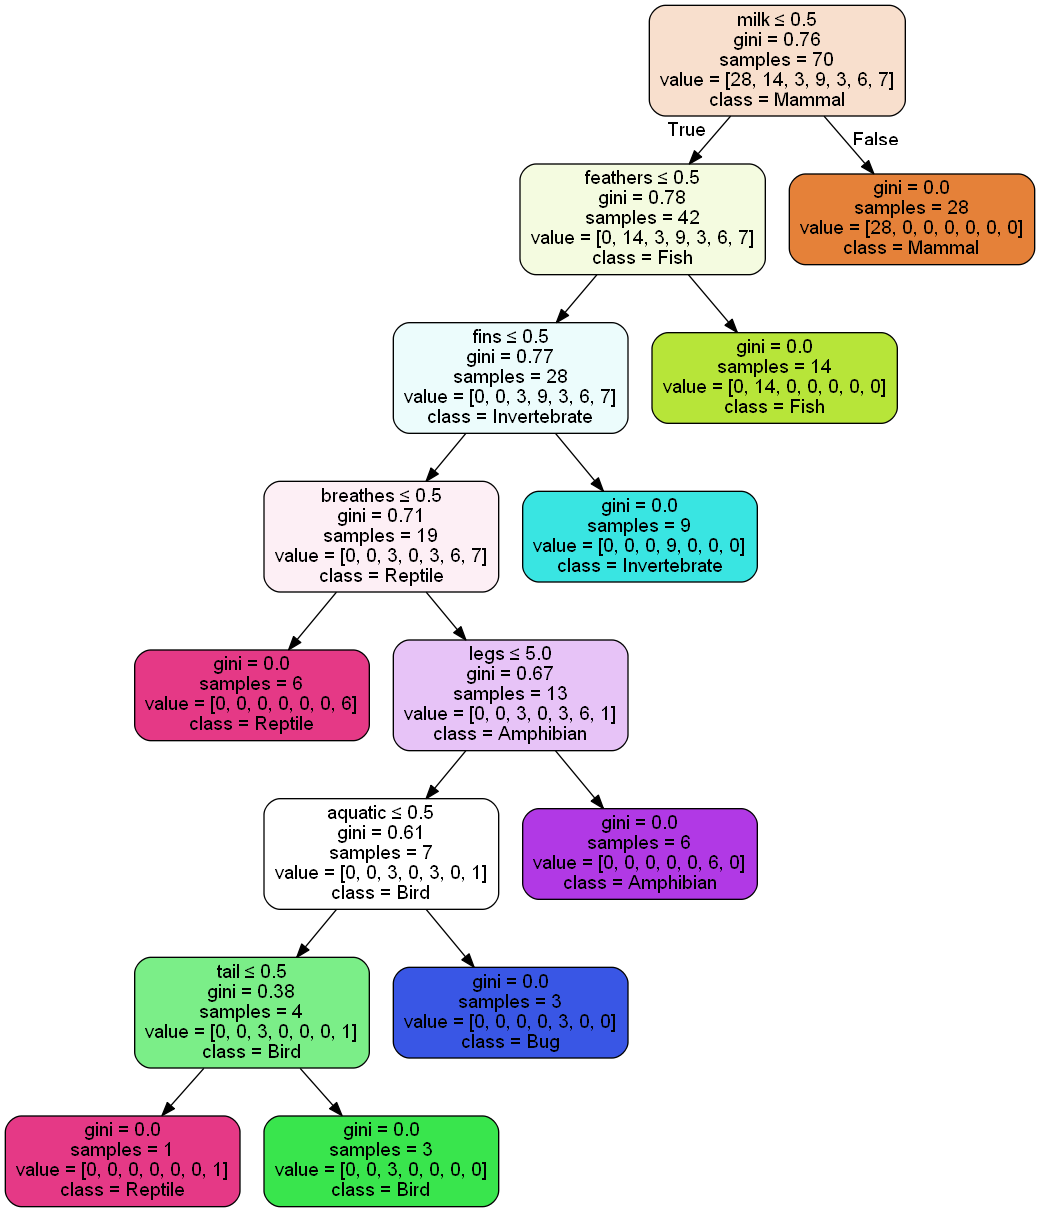

In [13]:
# Vizualize the tree

# set the path to graphviz
import os  # Windows OS
os.environ["PATH"] += os.pathsep + 'C:\\Anaconda3\\Library\\bin\\graphviz' # Windows OS


# import the necessary libraries

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# may need to install
# pip install pydotplus

dot_data = StringIO()

export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names = feature_names,
                class_names = class_names,
                proportion = False, precision = 2, 
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

Image(graph.create_png())

### Step 5. Measure the performance of the model

In [14]:
# Accuracy of the machine learning model

from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_test, Y_predict)
print(acc * 100 , "%")

93.54838709677419 %


In [15]:
# Build the confusion matrix
# Confusion matrix is build from the actual test_targets to the predicted test_predict.

from sklearn.metrics import confusion_matrix 

conf_matrix = confusion_matrix(Y_test, Y_predict)
print('Confusion Matrix :')
print(conf_matrix)

Confusion Matrix :
[[13  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  1  0  0  0  1]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  1  2]]


Exercise.

1. Identify another machine learning model from the sklearn library.
2. Apply the above steps to the identified model appropriately and measure its performance.
3. Compare the two models (model of this exercise and the identified model).